

## Datasets
The file *sat_gpa.csv* contains all training and testing data. It has 105 rows and 3 columns. Each row is the record of a student. The three columns are <u>Math SAT score</u>, <u>Verb SAT score</u>, and <u>University GPA</u>. The first two columns are the features, and the third is the output. All data points are used as the training set.

---

## Import packages

In [21]:
import numpy as np
from numpy.linalg import inv # Used for computing the inverse of matrix

import matplotlib.pyplot as plt
# Use `pip install matplotlib` in command line if matplotlib is not installed

---
## Load data and preprocessing

In [22]:
# Load data 
data = np.loadtxt(open('sat_gpa.csv'), delimiter=',')
print('shape of original data:', data.shape) # Check if data is 105 by 3

# Normalize data
data_norm = data / data.max(axis=0)

FileNotFoundError: [Errno 2] No such file or directory: 'sat_gpa.csv'

---
## Task 1
**3 points**

Implement the Normal Equation method for linear regression: $\theta = (X^T X)^{-1}X^T y$

Use the learned $\theta$ to make predictions: $\hat{y} = X\theta$

Compute the residual sum of squares of the model: $RSS = \sum_i (\hat{y}^{(i)} - y^{(i)})^2$

In [ ]:
# Create matrix X and y
# X has three columns: 
#   - The first column contain all 1s, which is for the intercept
#   - The second and third columns contain features, i.e., the 1st and 2nd columns of data_norm
# y has one column, i.e., the 3rd column of data_norm

X = np.ones_like(data_norm)
#### START YOUR CODE ####
X[:, 1:3] = data_norm[:,[0,1]]
y = data_norm[:,2]
#### END YOUR CODE ####


# Compute theta using normal equation method
# Hint: use the inv() function imported from numpy.linalg
#### START YOUR CODE ####
theta_method1 = inv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
#### END YOUR CODE ####


# Use the theta obtained to make predictions and compute the residuals
# Hint: use numpy.dot() and numpy.sum(), and avoid using for loops
#### START YOUR CODE ####
y_hat = np.dot(X, theta_method1)
RSS1 = np.sum(np.square(np.dot(X, theta_method1) - y))
#### END YOUR CODE ####

# Compute residuals


#### DO NOT CHANGE THE CODE BELOW ####
print('Theta obtained from normal equation:', theta_method1)
print('Residual sum of squares (RSS): ', RSS1)

### Expected ouput
&nbsp;|&nbsp;
--|--
Theta obtained from normal equation: | [-0.06234478  0.62017319  0.43647674]
Residual sum of squares (RSS): | 0.7590471383029533

---

## Task 2
**6 points**

Implement the Gradient Descent method for linear regression.

The cost function: $J(\theta_0, \theta_1, \theta_2) = \frac{1}{2m}\sum_i (\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2m}\sum_i (\theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} - y^{(i)})^2$

Gradients w.r.t. parameters: $\frac{\partial J}{\partial \theta} = \begin{cases}\frac{\partial J}{\partial \theta_0}\\ \frac{\partial J}{\partial \theta_1}\\ \frac{\partial J}{\partial \theta_2}\\ \end{cases} = \begin{cases}\frac{1}{m}\sum_i (\hat{y}^{(i)} - y^{(i)})\\ \frac{1}{m}\sum_i (\hat{y}^{(i)} - y^{(i)})x_1^{(i)}\\ \frac{1}{m}\sum_i (\hat{y}^{(i)} - y^{(i)})x_2^{(i)}\\\end{cases}$

The formula to update parameters at each iteration: $\theta := \theta - \alpha * \frac{\partial J}{\partial \theta}$

Note that $X$, $y$, and $\theta$ are all vectors (numpy arrays), and thus the operations above should be implemented in a vectorized fashion. Use `numpy.sum()`, `numpy.dot()` and other vectorized functions, and avoid writing `for` loops in Python.

In [ ]:
# Define the gradientDescent function
def gradientDescent(X, y, theta, alpha, num_iters):
    '''
    Params
        X - Shape: (m,3); m is the number of data examples
        y - Shape: (m,)
        theta - Shape: (3,)
        num_iters - Maximum number of iterations
    Return
        A tuple: (theta, RSS, cost_array)
        theta - the learned model parameters
        RSS - residual sum of squares
        cost_array - stores the cost value of each iteration. Its shape is (num_iters,)
    '''
    m = len(y)
    cost_array =[]

    for i in range(0, num_iters):
        #### START YOUR CODE ####
        # Make predictions
        # Shape of y_hat: m by 1
        y_hat = X.dot(theta)
        
        # Compute the difference between prediction (y_hat) and ground truth label (y)
        diff = y_hat-y

        # Compute the cost
        # Hint: Use the diff computed above
        cost = np.sum(np.square(diff))/(2*m)
        cost_array.append(cost)

        # Compute gradients
        # Hint: Use the diff computed above
        # Hint: Shape of gradients is the same as theta
        gradients =  np.dot(X.transpose(),diff)/m

        # Update theta
        theta = theta-alpha*gradients
        #### END YOUR CODE ####
    
    # Compute residuals
    # Hint: Should use the same code as Task 1
    #### START YOUR CODE ####
    y_hat = np.dot(X, theta)
    RSS = np.sum(np.square(y_hat - y))
    #### END YOUR CODE ####

    return theta, RSS, cost_array

In [ ]:
# This cell is to evaluate the gradientDescent function implemented above

#### DO NOT CHANGE THE CODE BELOW ####
# Define learning rate and maximum iteration number
ALPHA = 0.05
MAX_ITER = 500

# Initialize theta to [0,0,0]
theta = np.zeros(3)
theta_method2, RSS2, cost_array = gradientDescent(X, y, theta, ALPHA, MAX_ITER)

print('Theta obtained from gradient descent:', theta_method2)
print('Residual sum of squares (RSS): ', RSS2)

### Expected output
&nbsp;|&nbsp;
--|--
Theta obtained from gradient descent: | [0.29911574 0.32224209 0.31267172]
Residual sum of squares (RSS): | 0.8641600584370602


**NOTE**: It seems that the model trained with gradient descent has larger RSS than the one obtained with normal equation method.

---

## Task 3
**1 point**

Plot the cost against iteration number. This is a common method of examining the performance of gradient descent.

Try different values of learning rate, for example, $\alpha=\{0.01, 0.005, 0.001\}$, and see how the cost curves change. 

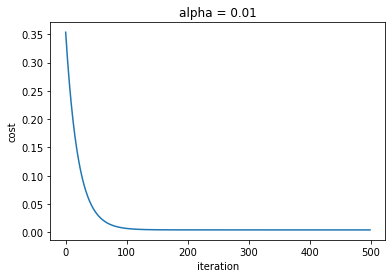

In [18]:
#### START YOUR CODE ####
alpha = 0.01
#### END YOUR CODE ####

theta = np.zeros(3)
_, _, cost_array = gradientDescent(X, y, theta, alpha, MAX_ITER)

plt.plot(range(0,len(cost_array)), cost_array);
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('alpha = {}'.format(alpha))
plt.show()

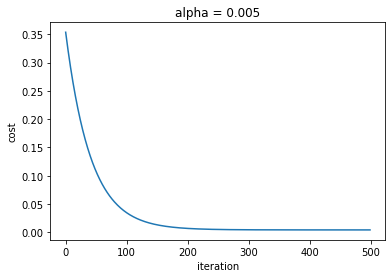

In [19]:
#### START YOUR CODE ####
alpha = 0.005
#### END YOUR CODE ####

theta = np.zeros(3)
_, _, cost_array = gradientDescent(X, y, theta, alpha, MAX_ITER)

plt.plot(range(0,len(cost_array)), cost_array);
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('alpha = {}'.format(alpha))
plt.show()

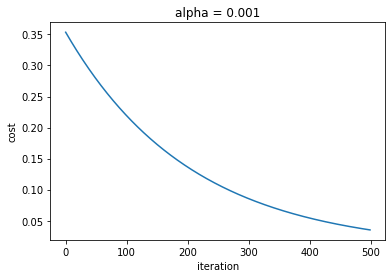

In [17]:
#### START YOUR CODE ####
alpha = 0.001
#### END YOUR CODE ####

theta = np.zeros(3)
_, _, cost_array = gradientDescent(X, y, theta, alpha, MAX_ITER)

plt.plot(range(0,len(cost_array)), cost_array);
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('alpha = {}'.format(alpha))
plt.show()